# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgrc_fanin_100.csv'
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
selected_individuals = 10
min_parameter_values = numpy.array([1.2e-10,0.6])
max_parameter_values = numpy.array([2.0e-9,1.4])
labels = ['MF-GrC Max Weight (nS)', 'MF-GrC LTD/LTP ratio']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 4 columns and 842 rows
Hall of fame:
1 . Parameters: [4.86629616e-10 1.21432115e+00] Features: [0.10833817 0.00324871]
2 . Parameters: [4.92297388e-10 1.22720046e+00] Features: [0.10733712 0.01032818]
3 . Parameters: [4.86012767e-10 1.24329850e+00] Features: [0.10576992 0.00174992]
4 . Parameters: [5.40513141e-10 1.31258913e+00] Features: [0.10557384 0.01535318]
5 . Parameters: [4.84537741e-10 1.28810114e+00] Features: [0.10517048 0.00600809]
6 . Parameters: [4.91128276e-10 1.26502102e+00] Features: [0.10393361 0.00518532]
7 . Parameters: [4.91128276e-10 1.28810114e+00] Features: [0.10355653 0.00377866]
8 . Parameters: [4.84537741e-10 1.26502102e+00] Features: [0.10352162 0.00746758]
9 . Parameters: [4.84150970e-10 1.27319214e+00] Features: [0.10335833 0.00438007]
10 . Parameters: [4.68888492e-10 1.15252206e+00] Features: [0.10331385 0.00673134]


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


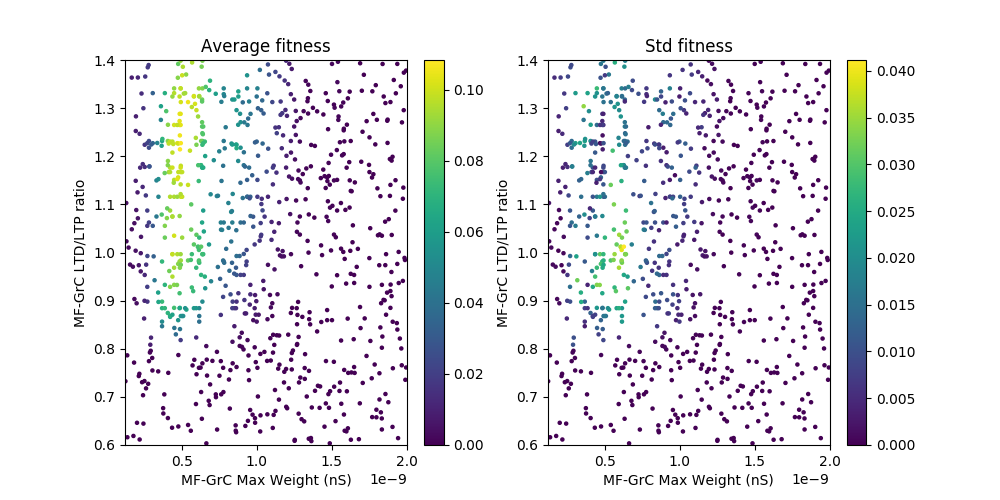

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


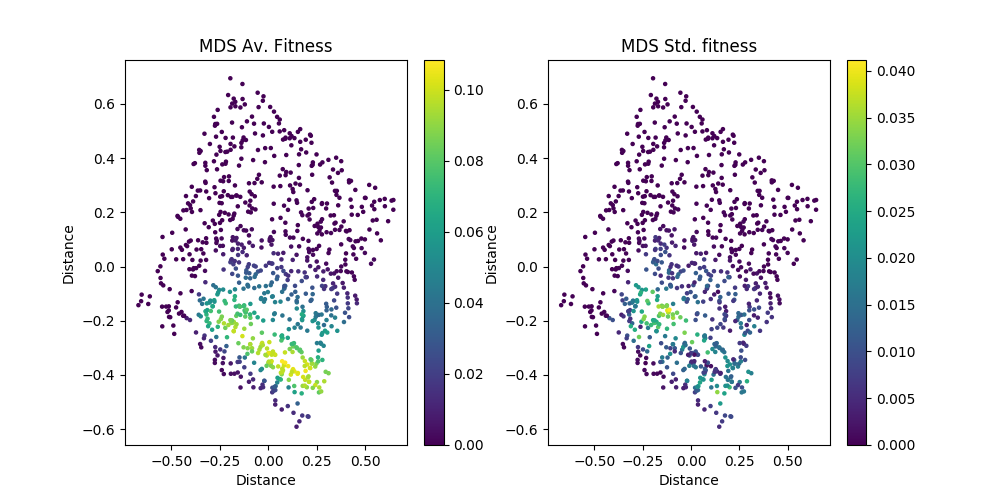

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=10000, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()